### Importing the libraries and data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv(r"C:\Users\HP\Downloads\python learning\capstone.csv")

In [37]:
# Display the first few rows of the dataset
df.head()


,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


### Decision Tree Regression

In [22]:
# Drop any rows with missing values
df.dropna(inplace=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split features and target variable
X = df.drop(['Age','Customer_id', 'Purchase_DATE', 'Revenue_Total','Gender','Pay_Method','Browser','Newsletter','Voucher'], axis=1)
y = df['Revenue_Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the decision tree regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)


### Feature Importance

In [25]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


          Feature  Importance
1  Purchase_VALUE    0.668165
2      Time_Spent    0.207345
0     N_Purchases    0.124490


### Evaluation Metrics

In [26]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)


print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r_squared}')
print(f'EVS: {evs}')

MAPE: 0.7935829885280684
RMSE: 14.46714074322202
MAE: 9.864198328267477
MSE: 209.29816128419455
R-squared: 0.06805511128604802
EVS: 0.068166458170281


### Actual Sales vs Predicted Sales

In [27]:
import pandas as pd
predictions_df = pd.DataFrame({
    'Actual Sales': y_test,  
    'Predicted Sales': y_pred
})

predictions_df


,Actual Sales,Predicted Sales
44712,31.0,26.8
43557,30.1,36.1
13540,44.3,11.5
15253,22.5,29.5
42221,0.7,0.7
...,...,...
15269,39.7,39.7
11299,25.3,34.1
32364,2.0,1.1
18432,20.2,9.8


### Applying Square Root Transformation

In [28]:
# Split features and target variable
X = df.drop(['Age','Customer_id', 'Purchase_DATE', 'Revenue_Total','Gender','Pay_Method','Browser','Newsletter','Voucher'], axis=1)
y = np.sqrt(df['Revenue_Total'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the decision tree regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)


### Evaluation Metrics

In [31]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)



print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r_squared}')
print(f'EVS: {evs}')

MAPE: 0.2761474709211005
RMSE: 1.529154887548713
MAE: 1.0344209265356328
MSE: 2.338314670114117
R-squared: 0.11607803714578491
EVS: 0.11608408927659175


### Actual Sales vs Predicted Sales

In [32]:
import pandas as pd
predictions_df = pd.DataFrame({
    'Actual Sales': y_test**2,  
    'Predicted Sales': y_pred**2
})

predictions_df


,Actual Sales,Predicted Sales
44712,31.0,25.5
43557,30.1,36.1
13540,44.3,11.5
15253,22.5,30.4
42221,0.7,0.7
...,...,...
15269,39.7,39.7
11299,25.3,34.1
32364,2.0,1.4
18432,20.2,3.6


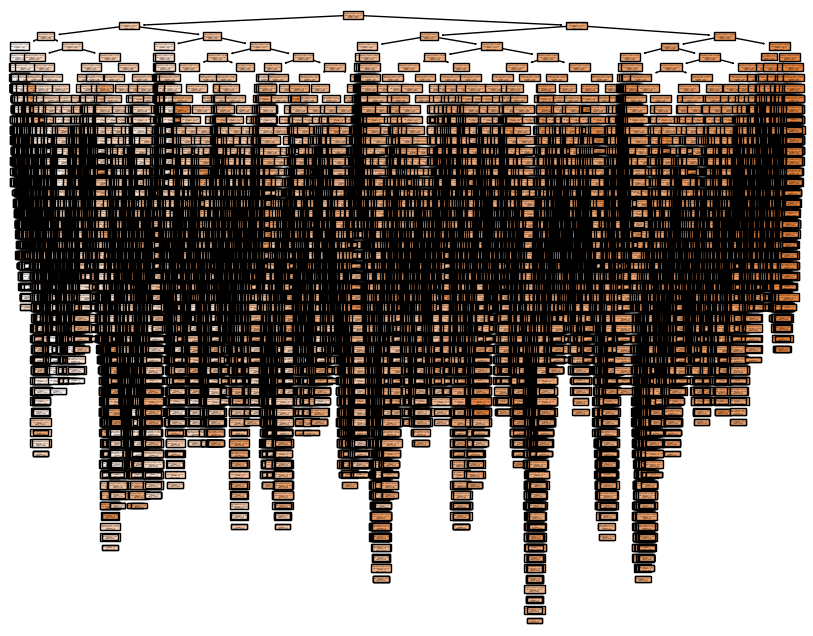

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()
